# Lab 11  Neural Networks
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu))
- **Date:** 15 April 2020
- **Course:** INFO 251: Applied machine learning

In [1]:
import pandas as pd
import numpy as np
import os
import time
from matplotlib import gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import IPython
import tensorflow as tf
import graphviz 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import IPython
%matplotlib inline


c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dimitris\miniconda3\envs\drl2\lib\site-packages\tensorf

### Topics:
1. Neural Networks https://www.tensorflow.org/tutorials/
http://rail.eecs.berkeley.edu/deeprlcourse/static/slides/lec-3.pdf

## Tensorflow

## Tensorflow regression example

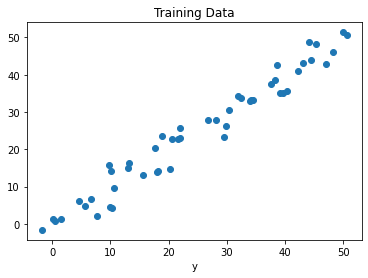

In [2]:
# Example from GeeksforGeeks
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

np.random.seed(101) 
tf.set_random_seed(101) 


# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [3]:
X = tf.placeholder(tf.float32) 
Y = tf.placeholder(tf.float32) 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 1000

In [4]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [5]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        # stochastic, in practice remember to shuffle your data or sample randomly and not sequentially
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        # gradient descent
        # sess.run(optimizer, feed_dict = {X : x, Y : y}) 
    
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.7912703 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459417 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.4453845 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.421903 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.401922 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848567 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.329476 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W 

In [6]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

## Tensorflow neural network example

In [10]:
## =================================================================
## =================================================================
from __future__ import print_function
import os
cwd = os.getcwd()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# Import MNIST data
#from tensorflow.examples.tutorials.m import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
## =================================================================
## =================================================================
## Import Spiral Data 
fname = 'spiral.txt'
data_points = np.genfromtxt('spiral.txt', usecols=(0, 1)).astype(np.float32)
data_labels = np.genfromtxt('spiral.txt', dtype=str, usecols=(2))
colors = np.zeros(len(data_labels))
for i in range(len(data_labels)):
    if(data_labels[i] == 'Red'):
        colors[i] = 1
# One hot encoding of labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# just for plotting later on
data_labels_temp = onehot_encoded 
colors = np.zeros(len(data_labels_temp))
for i in range(len(data_labels_temp)):
    if(str(int(data_labels_temp[i, 1])) == '1'):
        colors[i] = 1


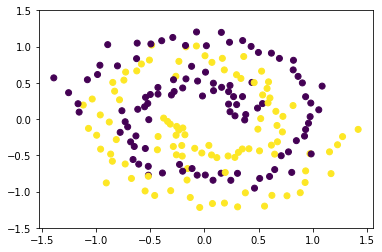

In [12]:
# =================================================================
# =================================================================
# Plots
# Plot Spiral        
plt.scatter(data_points[:,0], data_points[:,1], c=colors)
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
plt.show()
# =================================================================
# =================================================================


In [13]:
# Typical train test split
# from sklearn.model_selection import train_test_split
# train_x, test_x, train_y, test_y = train_test_split(
#      data_points, onehot_encoded, test_size=0.2, random_state=42)
test_ind = np.random.choice(range(len(data_points)), int(np.floor(0.3*len(data_points))))
train_ind = np.array(list(set(np.arange(len(data_points))) - set(test_ind)))
train_x = data_points[train_ind, :]
test_x = data_points[test_ind, :]
train_y = onehot_encoded[train_ind, :]
test_y = onehot_encoded[test_ind, :]

print("train set size is {}".format(train_x.shape))
print("train set size is {}".format(test_x.shape))


train set size is (146, 2)
train set size is (60, 2)


In [47]:
## Initialize Training Parameters
learning_rate = 0.01
batch_size = 40
num_steps = int(np.floor(len(train_x)/batch_size))
display_step = 1
EPOCHS = 1000
# regularization
beta = 1 
# Network Parameters
n_hidden_1 = 180 # 1st layer number of neurons
n_hidden_2 = 180 # 2nd layer number of neurotest_t[45:44]ns
n_hidden_3 = 180
num_input = 2 # Spiral data input 2-D points
num_classes = 2 # Total classes (red or black)
# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [48]:
## Initialize Layer Weights
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}
## =================================================================
## =================================================================
## Create model
def neural_net(x):
    # Hidden fully connected layer 
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer 
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer



In [51]:
## Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
# if you want to use regulariztion
#regularizer = tf.nn.l2_loss(weights)
loss_op = tf.reduce_mean(loss_op)# + beta * regularizer)
# or GradientDescentOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))# cast to new data type


In [ ]:
from sklearn.utils import shuffle
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
## =================================================================
## =================================================================
## Start training
sess=tf.Session()
# Run the initializer
test_acc = []
train_acc = []
sess.run(init)
train_x, train_y = shuffle(train_x, train_y)
for kk in range(EPOCHS):
    for step in range(1, num_steps+1):## check num_steps batch_sixe !!!!!!!

        batch_x, batch_y = train_x[(batch_size)*(step-1)+1:batch_size*(step),],train_y[(batch_size)*(step-1)+1:batch_size*(step),]  #mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
##        if step % display_step == 0 or step == 1:
##             Calculate batch loss and accuracy
##            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
##                                                                    Y: batch_y})
##            print("Step " + str(step) + ", Minibatch Loss= " + \
##                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
##                      "{:.3f}".format(acc))

    loss = sess.run(loss_op, feed_dict={X: train_x, Y: train_y})
    print("Epoch " + str(kk) + ", Training Loss= " + "{:.4f}".format(loss))
    acc_train = sess.run(correct_pred, feed_dict={X: train_x, Y: train_y})
    acc_train = np.sum(acc_train)/len(acc_train)
    train_acc.append(acc_train)
    print("Training Accuracy=" + str(acc_train))
    acc_test = sess.run(correct_pred, feed_dict={X: test_x, Y: test_y})
    acc_test = np.sum(acc_test)/len(acc_test)
    test_acc.append(acc_test)
    print("Test Accuracy=" + str(acc_test))

# Calculate accuracy for MNIST test images
#print("Testing Accuracy:", \
#sess.run(accuracy, feed_dict={X: test_x, Y: test_y})

Epoch 0, Training Loss= 99.3081
Training Accuracy=0.5616438356164384
Test Accuracy=0.4666666666666667
Epoch 1, Training Loss= 165.6809
Training Accuracy=0.6917808219178082
Test Accuracy=0.48333333333333334
Epoch 2, Training Loss= 109.1703
Training Accuracy=0.589041095890411
Test Accuracy=0.5833333333333334
Epoch 3, Training Loss= 141.3161
Training Accuracy=0.5068493150684932
Test Accuracy=0.4666666666666667
Epoch 4, Training Loss= 97.2374
Training Accuracy=0.6095890410958904
Test Accuracy=0.48333333333333334
Epoch 5, Training Loss= 72.6877
Training Accuracy=0.6301369863013698
Test Accuracy=0.48333333333333334
Epoch 6, Training Loss= 71.8426
Training Accuracy=0.636986301369863
Test Accuracy=0.5833333333333334
Epoch 7, Training Loss= 56.0217
Training Accuracy=0.6506849315068494
Test Accuracy=0.6166666666666667
Epoch 8, Training Loss= 44.1505
Training Accuracy=0.6917808219178082
Test Accuracy=0.6
Epoch 9, Training Loss= 14.9941
Training Accuracy=0.8356164383561644
Test Accuracy=0.58333333

Test Accuracy=0.6166666666666667
Epoch 168, Training Loss= 15.7731
Training Accuracy=0.863013698630137
Test Accuracy=0.7
Epoch 169, Training Loss= 4.1170
Training Accuracy=0.9315068493150684
Test Accuracy=0.7333333333333333
Epoch 170, Training Loss= 7.4063
Training Accuracy=0.910958904109589
Test Accuracy=0.7666666666666667
Epoch 171, Training Loss= 9.4876
Training Accuracy=0.9041095890410958
Test Accuracy=0.75
Epoch 172, Training Loss= 18.9143
Training Accuracy=0.8082191780821918
Test Accuracy=0.6
Epoch 173, Training Loss= 28.1666
Training Accuracy=0.8082191780821918
Test Accuracy=0.7666666666666667
Epoch 174, Training Loss= 37.0228
Training Accuracy=0.6986301369863014
Test Accuracy=0.5833333333333334
Epoch 175, Training Loss= 39.3995
Training Accuracy=0.6917808219178082
Test Accuracy=0.65
Epoch 176, Training Loss= 19.3884
Training Accuracy=0.8424657534246576
Test Accuracy=0.7333333333333333
Epoch 177, Training Loss= 4.9424
Training Accuracy=0.9041095890410958
Test Accuracy=0.76666666

Training Accuracy=0.9452054794520548
Test Accuracy=0.8
Epoch 335, Training Loss= 4.5046
Training Accuracy=0.9383561643835616
Test Accuracy=0.7833333333333333
Epoch 336, Training Loss= 3.6127
Training Accuracy=0.958904109589041
Test Accuracy=0.7833333333333333
Epoch 337, Training Loss= 3.7144
Training Accuracy=0.9452054794520548
Test Accuracy=0.8333333333333334
Epoch 338, Training Loss= 6.5987
Training Accuracy=0.910958904109589
Test Accuracy=0.8
Epoch 339, Training Loss= 3.2959
Training Accuracy=0.9452054794520548
Test Accuracy=0.8
Epoch 340, Training Loss= 4.0614
Training Accuracy=0.9452054794520548
Test Accuracy=0.7666666666666667
Epoch 341, Training Loss= 7.8173
Training Accuracy=0.910958904109589
Test Accuracy=0.75
Epoch 342, Training Loss= 3.1013
Training Accuracy=0.958904109589041
Test Accuracy=0.85
Epoch 343, Training Loss= 3.3340
Training Accuracy=0.9383561643835616
Test Accuracy=0.85
Epoch 344, Training Loss= 6.4962
Training Accuracy=0.910958904109589
Test Accuracy=0.8
Epoch 3

Training Accuracy=0.9315068493150684
Test Accuracy=0.7666666666666667
Epoch 503, Training Loss= 7.2489
Training Accuracy=0.9383561643835616
Test Accuracy=0.75
Epoch 504, Training Loss= 5.0903
Training Accuracy=0.9315068493150684
Test Accuracy=0.7833333333333333
Epoch 505, Training Loss= 4.1060
Training Accuracy=0.9452054794520548
Test Accuracy=0.7333333333333333
Epoch 506, Training Loss= 4.5776
Training Accuracy=0.9383561643835616
Test Accuracy=0.75
Epoch 507, Training Loss= 3.8528
Training Accuracy=0.9383561643835616
Test Accuracy=0.7666666666666667
Epoch 508, Training Loss= 5.2622
Training Accuracy=0.9383561643835616
Test Accuracy=0.7666666666666667
Epoch 509, Training Loss= 3.8007
Training Accuracy=0.9315068493150684
Test Accuracy=0.7833333333333333
Epoch 510, Training Loss= 5.7826
Training Accuracy=0.9178082191780822
Test Accuracy=0.75
Epoch 511, Training Loss= 4.8388
Training Accuracy=0.9657534246575342
Test Accuracy=0.7833333333333333
Epoch 512, Training Loss= 6.8984
Training Acc

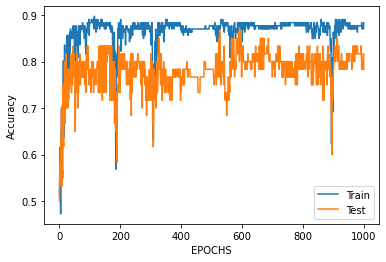

In [46]:
plt.plot(np.arange(EPOCHS), train_acc, label = 'Train')
plt.plot(np.arange(EPOCHS), test_acc, label = 'Test')
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.legend()

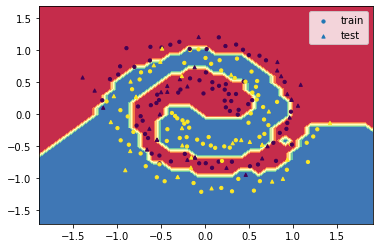

In [34]:
X = data_points
W0 = sess.run(weights)['h1']
B0 = sess.run(biases)['b1']
W1 = sess.run(weights)['h2']
B1 = sess.run(biases)['b2']
W2 = sess.run(weights)['h3']
B2 = sess.run(biases)['b3']
W3 = sess.run(weights)['out']
B3 = sess.run(biases)['out']

def neural_net_plot(X, W0, W1, W2, W3, B0, B1, B2, B3):
    # Hidden fully connected layer with 200 neurons
    #(*)
    layer_1 = np.maximum(np.matmul(X, W0) + B0, 0)
    # Hidden fully connected layer with 200 neurons
    #(*)
    layer_2 = np.maximum(np.matmul(layer_1, W1) + B1,0)
    # Output fully connected layer with a neuron for each class
    #
    layer_3 = np.maximum(np.matmul(layer_2, W2) + B2,0)
    # Output fully connected layer with a neuron for each class
    # (*) 
    logits = np.matmul(layer_3, W3) + B3
    #logits = np.matmul(X, W0) + B0
    out_layer = np.argmax(logits, 1)
    return out_layer


# Helper function to plot a decision boundary.
def plot_decision_boundary(neural_net_plot, X, W0, W1, W2, W3, B0, B1, B2, B3, col, test_ind, train_ind):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x_min = np.float32(x_min)
    x_max = np.float32(x_max)
    y_min = np.float32(y_min)
    y_max = np.float32(y_max)
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    xx = np.float32(xx)
    yy = np.float32(yy)
    #(*)
    Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0, W1, W2, W3, B0, B1, B2, B3)
    #Z = neural_net_plot(np.c_[xx.ravel(), yy.ravel()], W0, B0)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[train_ind, 0], X[train_ind, 1], s=10.5, c=col[train_ind], marker='o', label = 'train')
    plt.scatter(X[test_ind, 0], X[test_ind, 1], s=10.5, c=col[test_ind], marker='^', label = 'test')
    plt.legend()
    plt.show()


#(*)
plot_decision_boundary(neural_net_plot, X, W0, W1, W2, W3, B0, B1, B2, B3, colors, test_ind, train_ind)
#plot_decision_boundary(neural_net_plot, X, W0, B0, colors)

## Compare with RF

In [36]:
from sklearn.tree import DecisionTreeClassifier
# dont use one-hot encoded data for RF or LR.
integer_encoded = np.squeeze(integer_encoded)
train_y = integer_encoded[train_ind]
test_y = integer_encoded[test_ind]


k = 30
clf = DecisionTreeClassifier(criterion='entropy', max_depth=k)
# params: n_estimators=100 (number of trees in the forest), criterion (eg entropy),
# max_features how many features at each split defualt max_features=sqrt(n_features)
clf.fit(train_x, train_y)
predict_labels = clf.predict(test_x)


print("Accuracy of decision tree is {}".format(sum(predict_labels==test_y)/len(test_y)))

Accuracy of decision tree is 0.6833333333333333


In [37]:
from sklearn.linear_model import LogisticRegression

# logistic
clf_logistic = LogisticRegression()
clf_logistic.fit(train_x, train_y)
predict_labels = clf_logistic.predict(test_x)
print("Accuracy of LR is {}".format(sum(predict_labels==test_y)/len(test_y)))

Accuracy of LR is 0.5333333333333333
